In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 18, 12

import warnings
warnings.filterwarnings('ignore')

### 1. Сгенерируйте данные с помощью кода:



In [2]:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

In [3]:
print(len(x_data_generated))
x_data_generated

100


array([[ 0.99172274, -0.6750241 ,  0.4078582 , ...,  0.34017053,
        -1.49975993,  0.42410852],
       [ 0.79265124, -0.56706496, -0.59480058, ...,  0.22370291,
        -1.26651367, -0.06824215],
       [ 0.08223922, -0.95349672, -1.07300849, ...,  0.17041155,
        -1.92070221, -0.73428689],
       ...,
       [ 0.8777381 , -1.94814089, -1.08024972, ..., -0.06059084,
        -1.48442141, -1.06420476],
       [ 1.44094742, -0.01512325,  1.13501802, ..., -0.92175776,
        -2.58263303, -1.12794173],
       [ 0.28603954, -1.31015199,  1.20157766, ..., -0.77512024,
         0.79891511,  0.63871965]])

In [4]:
print(len(y_data_generated))
y_data_generated

100


array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

### 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [244]:
CVS = cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()
CVS

0.8800000000000001


### 3. Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.

In [7]:
# Соеденим наши x и у
data = np.column_stack((x_data_generated, y_data_generated))
data.shape

(100, 21)

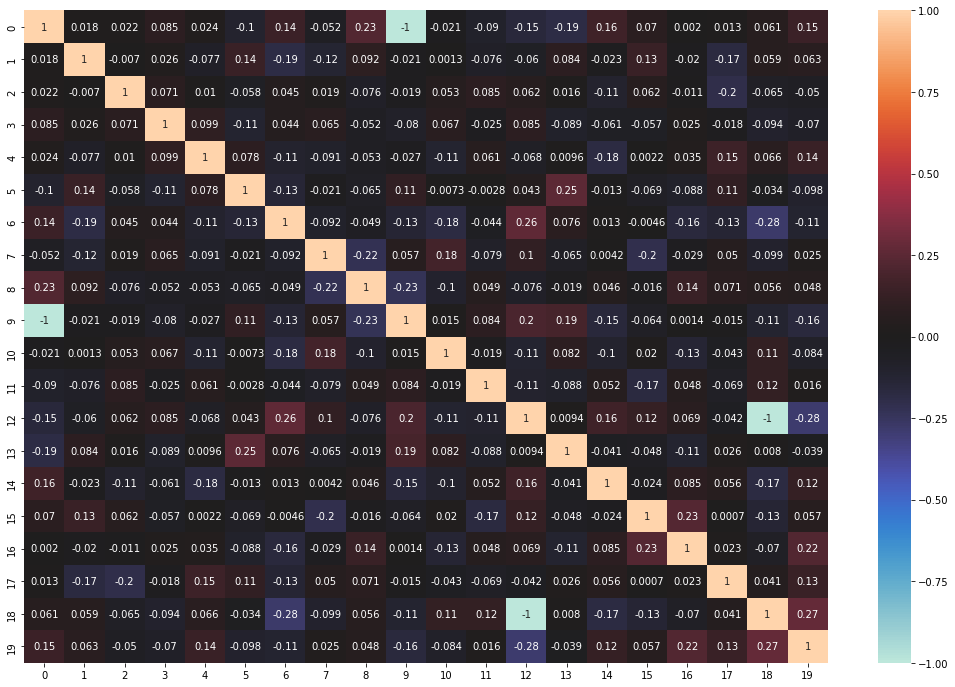

In [73]:
# Сделаем из нашего np.array ---> dataframe и посичтаем корреляцию
df = pd.DataFrame(data)
corr = df.loc[:, (df.columns != 20)].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0);

In [234]:
#Корреляция между 0-9, 12-18. Уберем 0 и 12.
X1 = df.loc[:, (df.columns != 0) & (df.columns != 12) & (df.columns != 20)]
y1 = df[20]

b) Отсеките низковариативные признаки (VarianceThreshold).

In [236]:
from sklearn.feature_selection import VarianceThreshold
X_VT = df.loc[:, df.columns!=20]
selector = VarianceThreshold(threshold=1)
X2 = selector.fit_transform(X_VT)

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [237]:
a3_ = cross_val_score(LogisticRegression(), X1, y1, scoring='accuracy').mean()
b3_ = cross_val_score(LogisticRegression(), X2, y1, scoring='accuracy').mean()

In [238]:
print(f'Cредняя точность, после корреляционной очитски: {a3_}\nCредняя точность, после VarianceThreshold очитски: {b3_}')

Cредняя точность, после корреляционной очитски: 0.8800000000000001
Cредняя точность, после VarianceThreshold очитски: 0.9400000000000001



### 4. Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).


In [144]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

x_sKB = df.loc[:, (df.columns != 20)]
y_sKB = df[20]

selector_k = SelectKBest(f_classif, k=5)
X3 = selector_k.fit_transform(x_sKB, y_sKB)

X3.shape

(100, 5)

b) Повторите п. 2 на отобранных признаках.



In [147]:
SKBest = cross_val_score(LogisticRegression(), X3, y1, scoring='accuracy').mean()
print(f'Cредняя точность, после дисперсионного анализа: {SKBest}')

Cредняя точность, после дисперсионного анализа: 0.93


### 5. Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.


In [154]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [158]:
X_temp = df.loc[:, (df.columns != 20)]

L_svc = LinearSVC(penalty="l1", C=0.1, dual=False).fit(X_temp, y1)
SFM = SelectFromModel(L_svc, prefit=True)
X4 = SFM.transform(X_temp)
X4.shape

(100, 6)

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.


In [159]:
from sklearn.ensemble import RandomForestClassifier

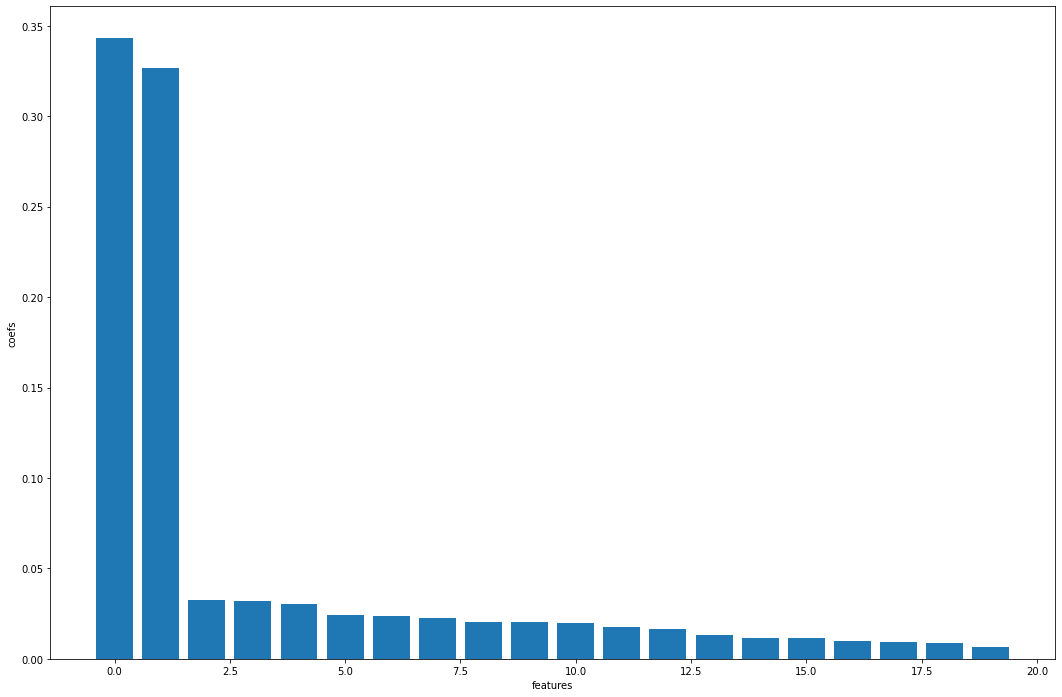

In [174]:
X_rf = df.loc[:, (df.columns != 20)]

rf = RandomForestClassifier(random_state=13, max_features=5).fit(X_rf, y1)
plt.bar(np.arange(len(rf.feature_importances_)), sorted(rf.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

In [214]:
from sklearn.feature_selection import RFE

selector_rfe = RFE(rf, n_features_to_select=6, step=1)
selector_rfe = selector_rfe.fit(X_rf, y1)

indexes = []
for i, el in enumerate(selector_rfe.support_):
    if el == True:
        indexes.append(i)
        
X5 = df[indexes]

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.



In [215]:
SFM_LVC = cross_val_score(LogisticRegression(), X4, y1, scoring='accuracy').mean()
RF_RFE = cross_val_score(LogisticRegression(), X5, y1, scoring='accuracy').mean()

In [216]:
print(f'Cредняя точность, после L1 SVC - SelectFromModel: {SFM_LVC}')
print(f'Cредняя точность, после модели RandomForest: {RF_RFE}')

Cредняя точность, после L1 SVC - SelectFromModel: 0.89
Cредняя точность, после модели RandomForest: 0.9199999999999999


### 6.Перебор признаков:
a) SequentialFeatureSelector.


In [222]:
from sklearn.feature_selection import SequentialFeatureSelector

x_sfs = df.loc[:, (df.columns != 20)]

sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=13), n_features_to_select=10, direction="forward"
)

In [223]:
sfs_forward.fit(x_sfs, y1)


SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=13),
                          n_features_to_select=10)

In [224]:
X6 = sfs_forward.transform(x_sfs)

b) Повторите п. 2 на отобранных признаках.



In [225]:
sfs = cross_val_score(LogisticRegression(), X6, y1, scoring='accuracy').mean()
print(f'Cредняя точность, после SequentialFeatureSelector: {sfs}')

Cредняя точность, после SequentialFeatureSelector: 0.9200000000000002


### 7.Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

Это вседействительно интересно и увлекательно, но пока уловить общий смысл смог. Пока очень силно плаваю, когда и где что применяется. Очевидно забываю про стандартизацию, номрализацию и (третье) забыл, и на каких данных и кодга использовать.
так видно, что методы рабочие, какие-то лучше какие-то хуже или медленее (например как прямой SequentialFeatureSelector).

In [254]:
total = {'Способ выбора признаков': \
         ['Без метода', 'Корреляция', 'VarianceThreshold', 'Скоринговая функция', \
          'L1 регуляризация', 'RandomForest', 'SequentialFeatureSelector'],\
        'Kоличество признаков': [x_data_generated.shape[1], X1.shape[1], X2.shape[1], \
                                 X3.shape[1], X4.shape[1], X5.shape[1], X6.shape[1]],\
        'Средняя точность модели': [CVS, a3_, b3_, SKBest, SFM_LVC, RF_RFE, sfs]}

In [255]:
resume = pd.DataFrame(total)
resume.sort_values(by='Средняя точность модели', ascending=False)

,Способ выбора признаков,Kоличество признаков,Средняя точность модели
2,VarianceThreshold,13,0.94
3,Скоринговая функция,5,0.93
6,SequentialFeatureSelector,10,0.92
5,RandomForest,6,0.92
4,L1 регуляризация,6,0.89
0,Без метода,20,0.88
1,Корреляция,18,0.88
